In [10]:
# set up working catalog
import sys
from pathlib import Path
project_path = str(Path().cwd().parent.parent.resolve())
if project_path not in sys.path:
    sys.path.append(project_path)
    
# imports
from common.utils import get_data, get_preprocessor
from common.custom_logistic_regression import CustomLogisticRegressionMulticlass

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [11]:
data = get_data()
X = data.drop(columns=["Target"])
y = data["Target"]

data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,single,2nd phase - general contingent,6th choice,Animation and Multimedia Design,Daytime,Secondary education,122.0,Portuguese,Basic Ed 3rd Cycle,Other - 11th Year,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,single,International student (bachelor),2nd choice,Tourism,Daytime,Secondary education,160.0,Portuguese,Secondary Education - 12th Year or Eq.,Higher Ed - Degree,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,single,1st phase - general contingent,6th choice,Communication Design,Daytime,Secondary education,122.0,Portuguese,Basic Ed 1st Cycle (4th/5th),Basic Ed 1st Cycle (4th/5th),...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,single,2nd phase - general contingent,3rd choice,Journalism and Communication,Daytime,Secondary education,122.0,Portuguese,Basic Ed 2nd Cycle (6th–8th),Basic Ed 1st Cycle (4th/5th),...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,married,Over 23 years old,2nd choice,Social Service (evening attendance),Evening,Secondary education,100.0,Portuguese,Basic Ed 1st Cycle (4th/5th),Basic Ed 2nd Cycle (6th–8th),...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [12]:
def train(model, X, y, degree=None, include_bias=False):
    numerical_column_names = X.select_dtypes(include=["number"]).columns.tolist()
    categorical_column_names = X.select_dtypes(include=["object"]).columns.tolist()

    preprocessor = get_preprocessor(numerical_column_names, categorical_column_names, degree=degree, include_bias=include_bias)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    preprocessor.fit(X_train)
    X_test_transformed = preprocessor.transform(X_test)

    pipeline = Pipeline([
        ("preprocessing", preprocessor),
        ("classifier", model)
    ])

    pipeline.fit(
        X_train,
        y_train,
        classifier__get_convergence_diagram=True,
        classifier__X_test=X_test_transformed,
        classifier__y_test=y_test
    )

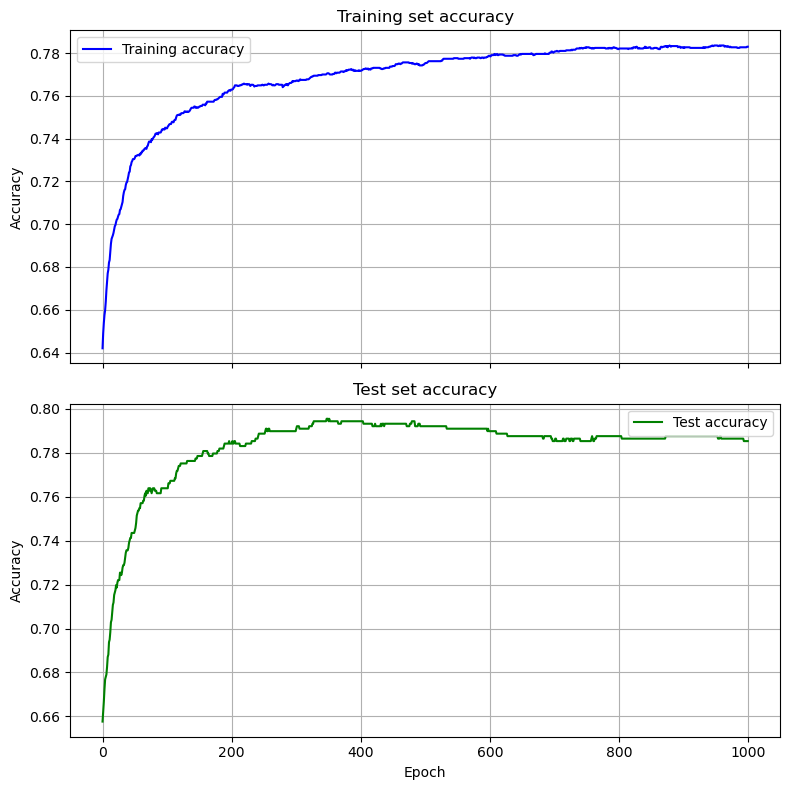

In [13]:
model = CustomLogisticRegressionMulticlass(epochs=1000, batch_size=256, learning_rate=0.01)
train(model, X, y)

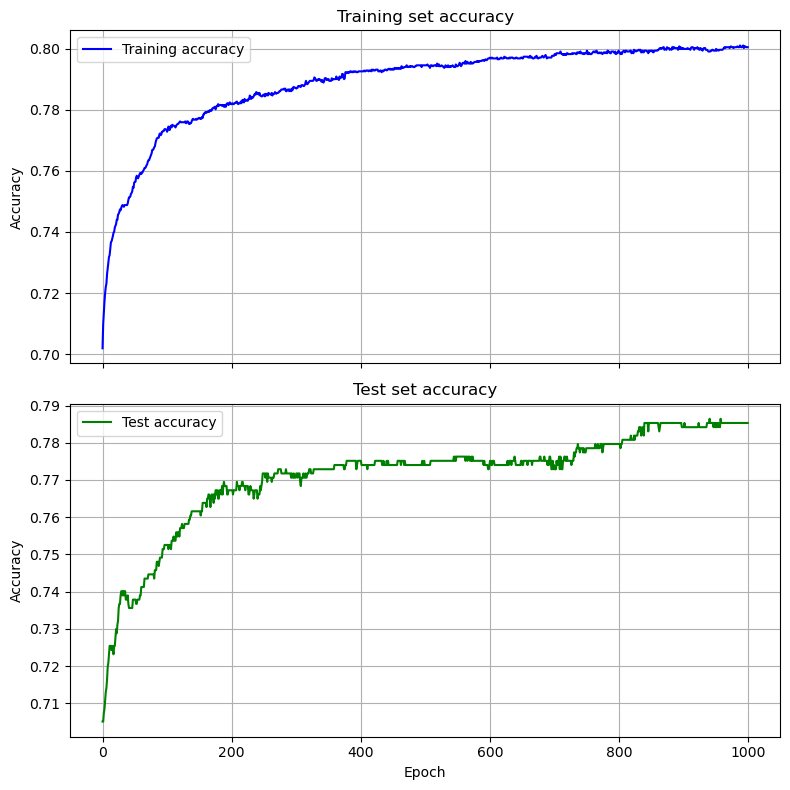

In [14]:
train(model, X, y, degree=2)

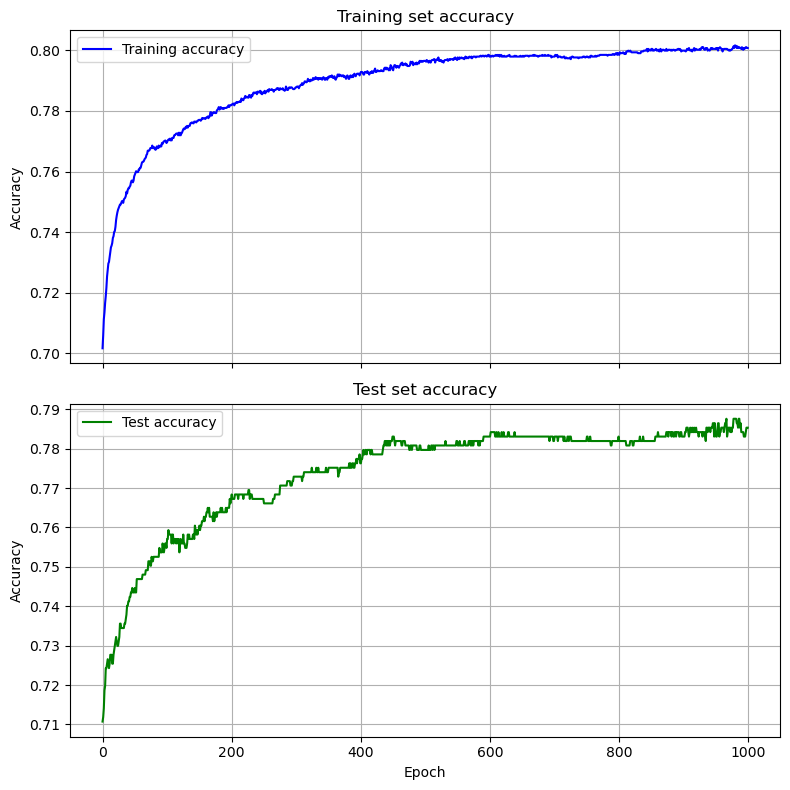

In [15]:
train(model, X, y, degree=2, include_bias=True)

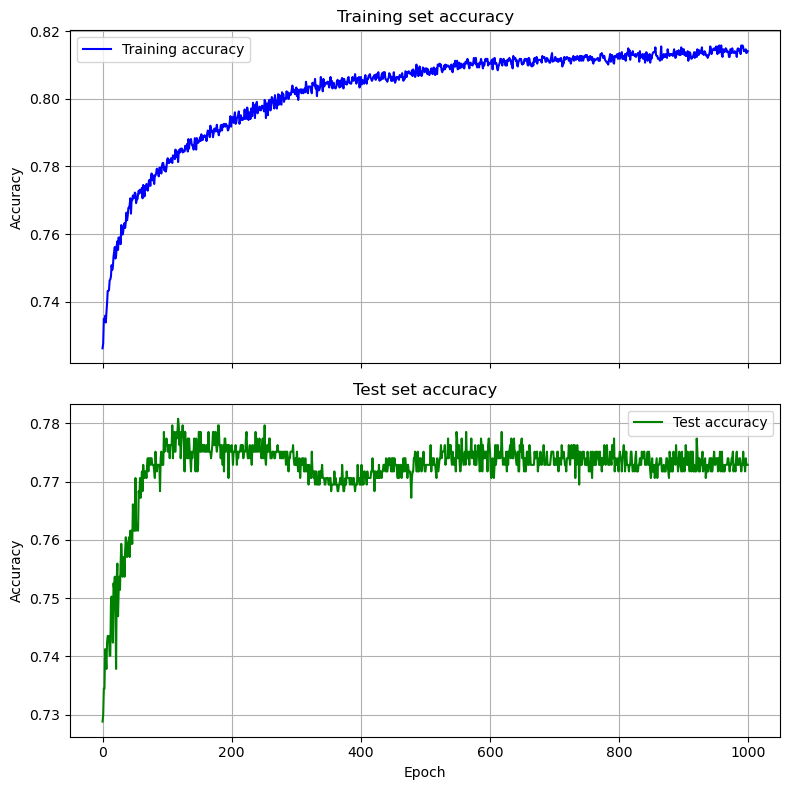

In [16]:
train(model, X, y, degree=3)

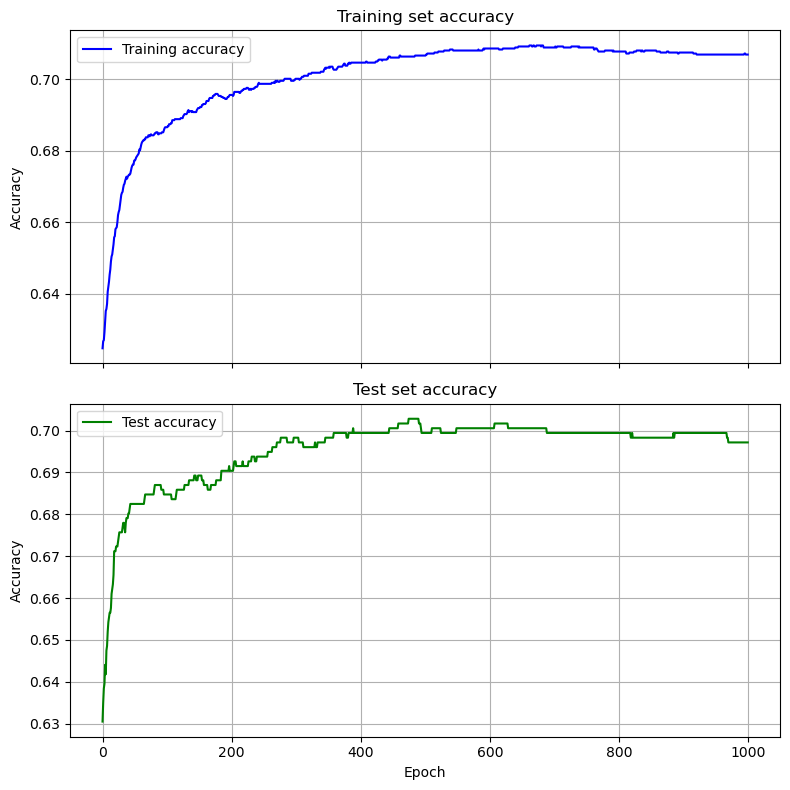

In [25]:
X_reduced_features = X[["Age at enrollment", "GDP", "Unemployment rate", "Inflation rate",
    "Curricular units 1st sem (approved)", "Curricular units 1st sem (grade)",
    "Admission grade", "Previous qualification (grade)", 
    "Marital status", "Application mode", "Application order", "Daytime/evening attendance",
    "Displaced", "Debtor", "Scholarship holder", "Gender",
    "Mother's occupation", "Father's occupation",
    "Mother's qualification", "Father's qualification"]]

train(model, X_reduced_features, y)

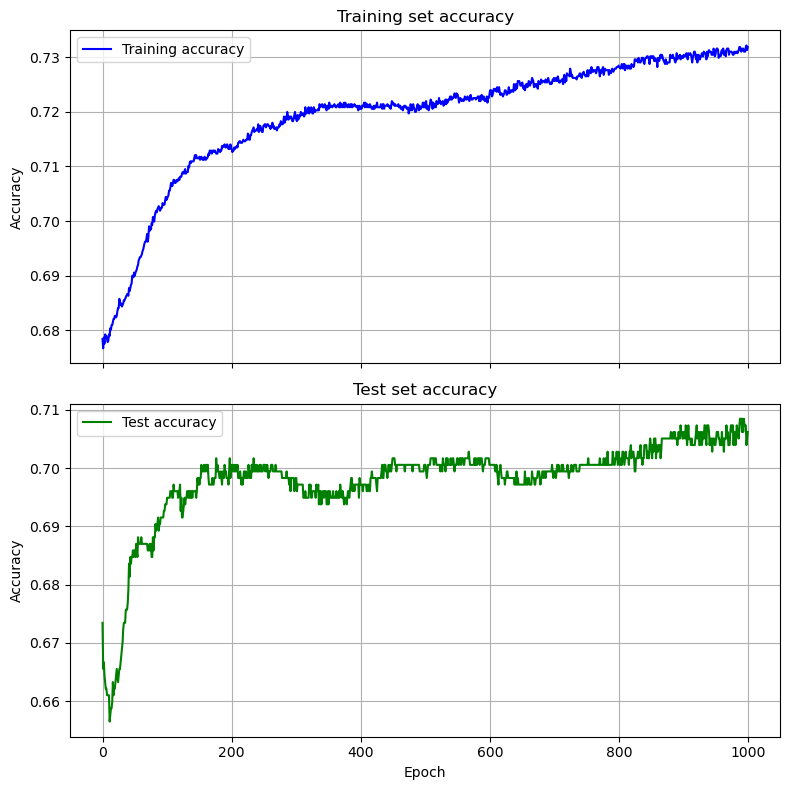

In [29]:
train(model, X_reduced_features, y, degree=3)

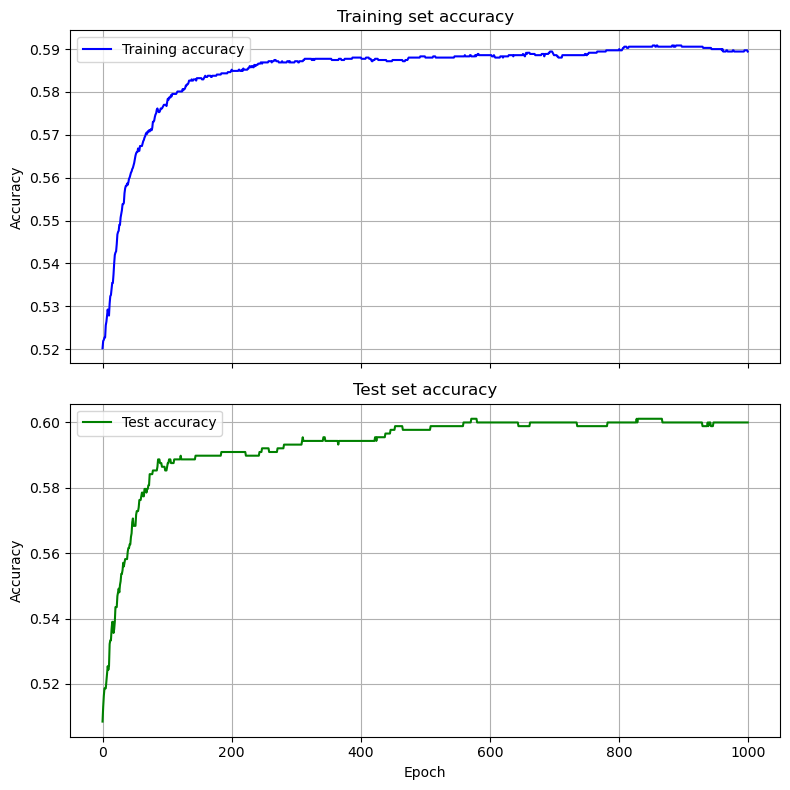

In [33]:
X_economic = X[["Age at enrollment", "GDP", "Unemployment rate", "Inflation rate",
    "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation",
    "Debtor", "Scholarship holder"
]]

train(model, X_economic, y)

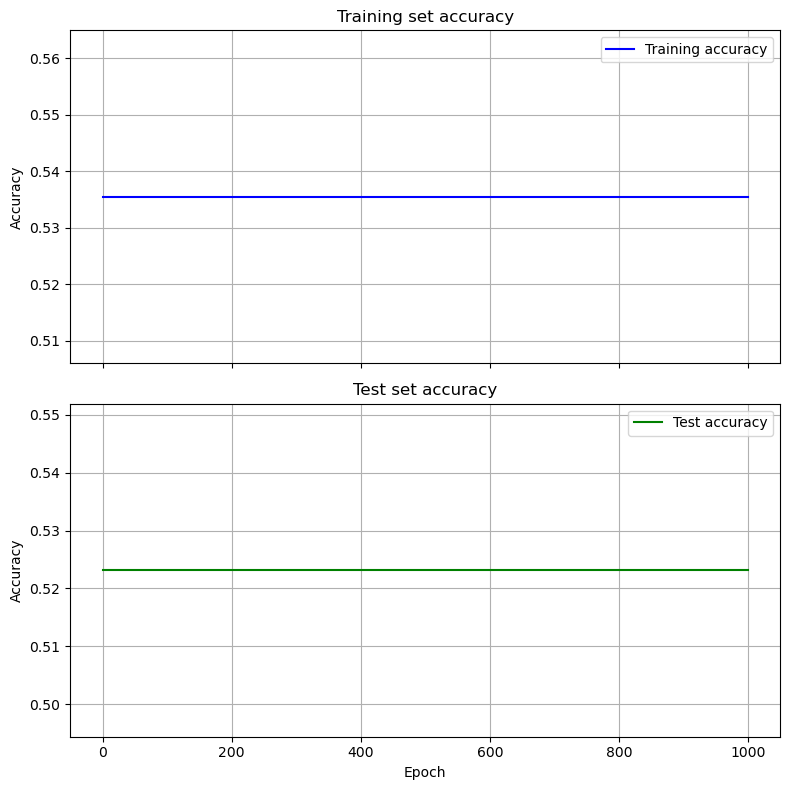

In [35]:
X_age = X[["Age at enrollment"]]

train(model, X_age, y)